**Part of the code was taken from:**
https://github.com/ShubhankarRawat/Heart-Disease-Prediction/blob/master/heart_code.py





# Imports

In [ ]:
!pip install matplotlib==3.4

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Loading and preprocessing data

In [ ]:
df = pd.read_csv("processed.cleveland.data", sep=',',
                  names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
                         'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 
                         'ca', 'thal', 'target'], na_values='?')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.isnull().sum()

df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Classifier 1: KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Accuracy for KNN:  0.6885245901639344
Sensitivity for KNN:  0.6923076923076923 
 Specificity for KNN:  0.8857142857142857


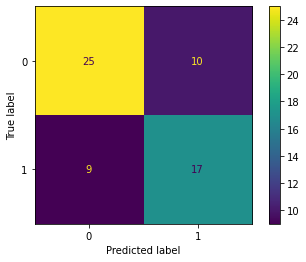

In [ ]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy for KNN: ", acc)

knn_cm = metrics.confusion_matrix(y_test, y_pred)
knn_cm_display = metrics.ConfusionMatrixDisplay(knn_cm, display_labels=[0, 1]).plot()

tn, fp, fn, tp = cm.ravel()
sens = tp / (tp + fn)
spec = tn / (tn + fp)
print("Sensitivity for KNN: ", sens, '\n', "Specificity for KNN: ", spec)

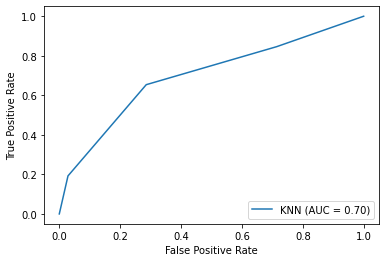

In [ ]:
proba = knn.predict_proba(X_test)[:, 1]

aucScore = metrics.roc_auc_score(y_test, proba)

fpr, tpr, _ = metrics.roc_curve(y_test, proba, pos_label=knn.classes_[1])
roc = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=aucScore,
                              estimator_name='KNN').plot()

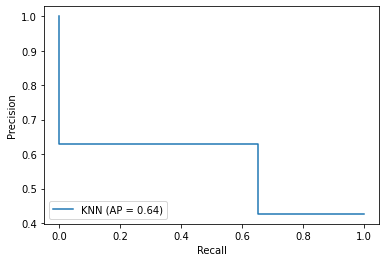

In [ ]:
fScore = metrics.f1_score(y_test, y_pred)

prec, recall, _ = metrics.precision_recall_curve(y_test, y_pred,
                                                 pos_label=knn.classes_[1])
fMeasure = metrics.PrecisionRecallDisplay(precision=prec, recall=recall,
                                          average_precision=fScore,
                                          estimator_name='KNN').plot()

# Classifier 2: SVM

In [ ]:
svm = SVC(kernel = 'rbf', probability=True)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

Accuracy for SVM:  0.5737704918032787
Sensitivity for SVM:  0.6923076923076923 
 Specificity for SVM:  0.8857142857142857


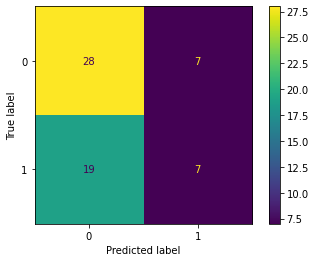

In [ ]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy for SVM: ", acc)

svm_cm = metrics.confusion_matrix(y_test, y_pred)
svm_cm_display = metrics.ConfusionMatrixDisplay(svm_cm, display_labels=[0, 1]).plot()

tn, fp, fn, tp = cm.ravel()
sens = tp / (tp + fn)
spec = tn / (tn + fp)
print("Sensitivity for SVM: ", sens, '\n', "Specificity for SVM: ", spec)

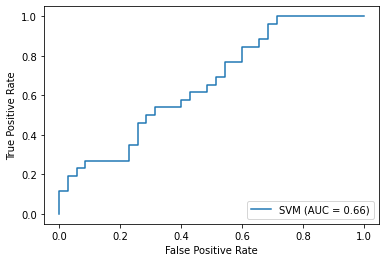

In [ ]:
proba = svm.predict_proba(X_test)[:, 1]

aucScore = metrics.roc_auc_score(y_test, proba)

fpr, tpr, _ = metrics.roc_curve(y_test, proba, pos_label=svm.classes_[1])
roc = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=aucScore,
                              estimator_name='SVM').plot()

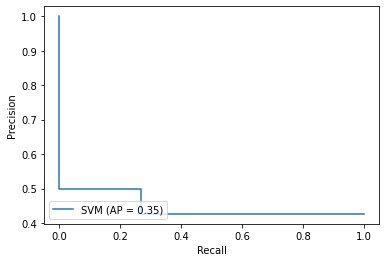

In [ ]:
fScore = metrics.f1_score(y_test, y_pred)

prec, recall, _ = metrics.precision_recall_curve(y_test, y_pred,
                                                 pos_label=svm.classes_[1])
fMeasure = metrics.PrecisionRecallDisplay(precision=prec, recall=recall,
                                          average_precision=fScore,
                                          estimator_name='SVM').plot()

# Classifier 3: Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

Accuracy for Random Forest:  0.7377049180327869
Sensitivity for RF:  0.6923076923076923 
 Specificity for RF:  0.8857142857142857


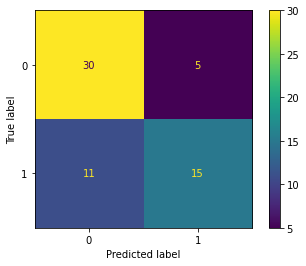

In [ ]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy for Random Forest: ", acc)

rf_cm = metrics.confusion_matrix(y_test, y_pred)
rf_cm_display = metrics.ConfusionMatrixDisplay(rf_cm, display_labels=[0, 1]).plot()

tn, fp, fn, tp = cm.ravel()
sens = tp / (tp + fn)
spec = tn / (tn + fp)
print("Sensitivity for RF: ", sens, '\n', "Specificity for RF: ", spec)

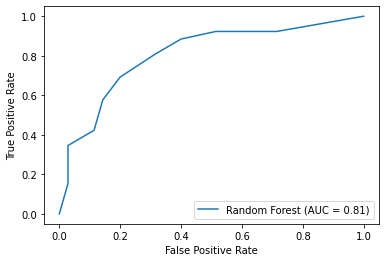

In [ ]:
proba = rf.predict_proba(X_test)[:, 1]

aucScore = metrics.roc_auc_score(y_test, proba)

fpr, tpr, _ = metrics.roc_curve(y_test, proba, pos_label=rf.classes_[1])
roc = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=aucScore,
                              estimator_name='Random Forest').plot()

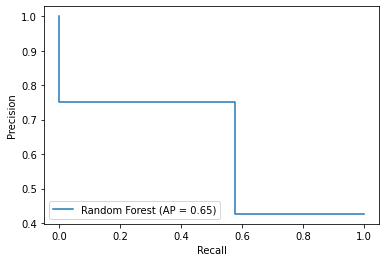

In [ ]:
fScore = metrics.f1_score(y_test, y_pred)
prec, recall, _ = metrics.precision_recall_curve(y_test, y_pred,
                                                 pos_label=rf.classes_[1])
fMeasure = metrics.PrecisionRecallDisplay(precision=prec, recall=recall,
                                          average_precision=fScore,
                                          estimator_name='Random Forest').plot()

# Create Plot

Text(0.5, 0.98, 'ROC curve comparison')

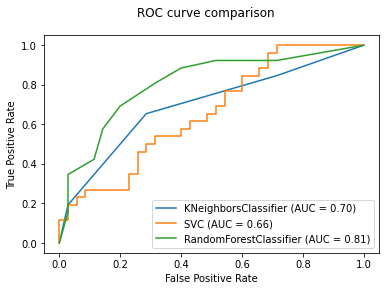

In [ ]:
# Create combined ROC plot
knn_disp = metrics.plot_roc_curve(knn, X_test, y_test)
svm_disp = metrics.plot_roc_curve(svm, X_test, y_test, ax=knn_disp.ax_)
rf_disp  = metrics.plot_roc_curve(rf, X_test, y_test, ax=svm_disp.ax_)
rf_disp.figure_.suptitle("ROC curve comparison")
